# 생선분류
- 데이터셋 : fish.csv
- 피쳐/특성 : Weight, Length
- 타겟/라벨 : Species 
- 학습방법 : 지도학습 -> 분류
- 학습알고리즘 : 최근접이웃알고리즘(KNN)

## [1] 데이터 준비

In [64]:
import pandas as pd
import matplotlib.pyplot as plt

In [65]:
DATA_FILE = '../data/fish.csv'

In [66]:
# 행 : Bream, Smelt 컬럼 : Species, Weight, Length => 0,1,2
fish_df = pd.read_csv(DATA_FILE)
fish_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Species   159 non-null    object 
 1   Weight    159 non-null    float64
 2   Length    159 non-null    float64
 3   Diagonal  159 non-null    float64
 4   Height    159 non-null    float64
 5   Width     159 non-null    float64
dtypes: float64(5), object(1)
memory usage: 7.6+ KB


In [67]:
fish_df.head(3)

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961


In [68]:
mask = (fish_df['Species'] == 'Bream') | (fish_df['Species'] == 'Smelt')
two_df = fish_df[mask].copy()
two_df.reset_index(drop=True, inplace = True)
two_df.index

RangeIndex(start=0, stop=49, step=1)

In [69]:
# Species 컬럼 수치화 
# -> Bream 0, Smelt 1
two_df['fcode'] = two_df.loc[:,'Species'].replace({'Bream':0, 'Smelt':1})

## [2] 피쳐와 타겟 분리

In [70]:
features = two_df[['Weight','Length']]
target = two_df['fcode']

print(f'featrues -> {features.shape}, {features.ndim}D')
print(f'target -> {target.shape}, {target.ndim}D')

featrues -> (49, 2), 2D
target -> (49,), 1D


## [3] 데이터셋 준비 -> 학습용, 테스트용

In [71]:
from sklearn.model_selection import train_test_split

In [72]:
# train : test = 80 : 20
# stratify 매개변수 : 분류일 경우 사용, 분류 타겟의 종류에 대한 비율 고려 
# - 현재 물고기의 수가 다르므로 정의 
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, stratify=target, random_state=10) 
# test_size에 값을 지정하면 train_size는 1-test_size

In [73]:
print(f'x_train : {x_train.shape}, {x_train.ndim}D')
print(f'y_train : {y_train.shape}, {y_train.ndim}D')

print(f'x_test : {x_test.shape}, {x_test.ndim}D')
print(f'y_test : {y_test.shape}, {y_test.ndim}D')

x_train : (39, 2), 2D
y_train : (39,), 1D
x_test : (10, 2), 2D
y_test : (10,), 1D


In [74]:
y_train.value_counts()

fcode
0    28
1    11
Name: count, dtype: int64

In [75]:
# target 0(Bream), 1(Smelt)의 비율
y_train.value_counts()[0]/y_train.shape[0], y_train.value_counts()[1]/y_train.shape[0]

(0.717948717948718, 0.28205128205128205)

In [76]:
y_test.value_counts()

fcode
0    7
1    3
Name: count, dtype: int64

In [77]:
y_test.value_counts()[0]/y_test.shape[0], y_test.value_counts()[1]/y_test.shape[0]

(0.7, 0.3)

## [4] 학습/훈련

In [78]:
# 모듈 로딩 
from sklearn.neighbors import KNeighborsClassifier

In [79]:
# 인스턴스 생성 
model = KNeighborsClassifier() # 모델 생성

In [80]:
# 학습 진행 -> 학습용 데이터셋 
model.fit(x_train, y_train)

KNeighborsClassifier()

In [81]:
# 학습 후 모델 파라미터 
model.classes_, model.feature_names_in_, model.n_samples_fit_

(array([0, 1], dtype=int64), array(['Weight', 'Length'], dtype=object), 39)

In [82]:
model.score(x_test, y_test)

1.0

In [83]:
model.score(x_train, y_train)

1.0

# [5] 예측하기 
-> 학습/훈련과 테스트에 사용되지 않은 데이터 사용

- 주의 : 입력 데이터 : 2D 

In [84]:
new_data = [[413,27.8]]

In [85]:
model.predict(new_data)

# 데이터 프레임으로 만들어줘야 함 

c:\Users\KDP-35\anaconda3\envs\ML_38\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [86]:
new_data = pd.DataFrame([[413,27.8]], columns=model.feature_names_in_)
new_data

,Weight,Length
0,413,27.8


In [87]:
model.predict(new_data)

array([0], dtype=int64)

In [88]:
## 최근접한 k개 데이터 찾기 
distance, index = model.kneighbors(new_data)

In [89]:
distance

array([[17.04230031, 23.10497782, 37.04875167, 37.0653477 , 50.01439793]])

In [90]:
index

array([[25,  0, 21,  6, 22]], dtype=int64)

In [91]:
neighbors = index.reshape(-1).tolist() # index가 2차원이라서 reshape
neighbors 

[25, 0, 21, 6, 22]

In [92]:
two_df.iloc[neighbors]

,Species,Weight,Length,Diagonal,Height,Width,fcode
25,Bream,725.0,35.0,40.9,16.3600,6.0532,0
0,Bream,242.0,25.4,30.0,11.5200,4.0200,0
21,Bream,685.0,34.0,39.2,15.9936,5.3704,0
6,Bream,500.0,29.7,34.5,14.1795,5.2785,0
22,Bream,620.0,34.5,39.7,15.5227,5.2801,0


## [6] 시각화

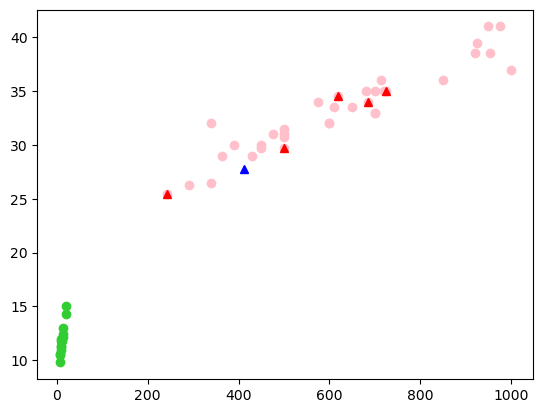

In [93]:
# 시각화로 확인 

# 도미, 방어에 대한 시각화 

plt.scatter(two_df.loc[:34,'Weight'],two_df.loc[:34,'Length'], color = 'pink') # Bream
plt.scatter(two_df.loc[35:,'Weight'],two_df.loc[35:,'Length'], color = 'limegreen') # Smelt

plt.plot(new_data['Weight'], new_data['Length'], 'b^')

plt.plot(two_df.iloc[neighbors]['Weight'], two_df.iloc[neighbors]['Length'], 'r^')
plt.show()

KNN 의 문제점 : 피쳐들의 범위가 크므로 정규화 필요
- x축 범위가 y축 범위와 매우 큰 차이가 나기 때문
- x축의 영향이 더 큼

=> min-max normalization, z-score standardsiztion
